In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dt = pd.read_csv('Train.csv')
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print (dt.shape)

(8523, 12)


In [4]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [7]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Store the Categorical columns in a list
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# Delete the columns 
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# Display the Unique Values in category columns – Count 
for col in cat_col:
    print(col , len(dt[col].unique()))


Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [12]:
# Unique values in each category
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [13]:
# Display the missing values - missing values will be True 
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
dt[dt['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [15]:
display (dt['Item_Weight'].isnull().sum())

1463

In [16]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [17]:
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [18]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [19]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [20]:
# Fill the missing values (Item Weight) with mean, the mean calculated by group by Item identifier  

for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\4294390805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\4294390805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\4294390805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [21]:
# Check the Null values again – Same column
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [22]:
# Record count based on 'Outlet_Size'
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)


,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [23]:
# NULL Record based on 'Outlet_Size'

result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [24]:
# Display all NULL Records 
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
# Null Record count based on -Outlet Type  
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [26]:
# Group by based on Outlet_Type and Outlet_Size to find the most repeated value, this is to fill missing value by Outlet Type 
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [27]:
# Alternate way to identify most repeated value – Mode
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
# Use Mode to fill missing values 
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [29]:
dt['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [30]:
display (dt['Outlet_Size'].isnull().sum())

0

In [31]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [32]:
# Check Item visibility column with value - 0
display (sum(dt['Item_Visibility']==0))



526

In [33]:
# Replace zeros with mean
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)


In [34]:
# Check any value with 0 again 
display(sum(dt['Item_Visibility']==0))


0

In [35]:
# Check distinct values - Item_Fat_Content
result = dt['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [36]:
# Consolidate similar Column Values 
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [37]:
# Create new attributes with first two characters of item identifier column
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [38]:
# Display Number of records in each category 
display (dt['New_Item_Type'].value_counts())


New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [39]:
# Map the values

dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())


New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [40]:
# Display distinct values in Item_Fat_Content

display (dt['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [41]:
# Display the count based on New_Item_Type and Item_Fat_Content

result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [42]:
# Update Item_Fat_Content  to ‘Non Edible’  where New_Item_Type = Non-Consumable

dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)


Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [43]:
# Display the count based on New_Item_Type and Item_Fat_Content
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [44]:
# Display how many years the outlet is present
# 2024 (Current year) - 'Outlet_Establishment_Year' 

dt['Outlet_Years'] = 2024 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])




0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64


In [45]:
# Display Top 5 Records 
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37


C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\3691716118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Item_Weight'])


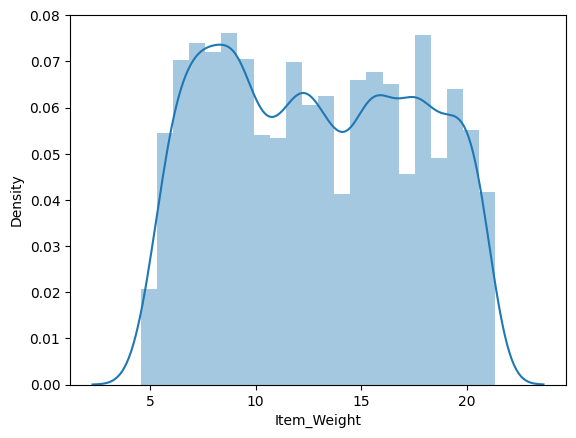

In [46]:
# Create Dist Plot – Item Weight  
sns.distplot(dt['Item_Weight'])
plt.show()


C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\975763628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Item_Visibility'])


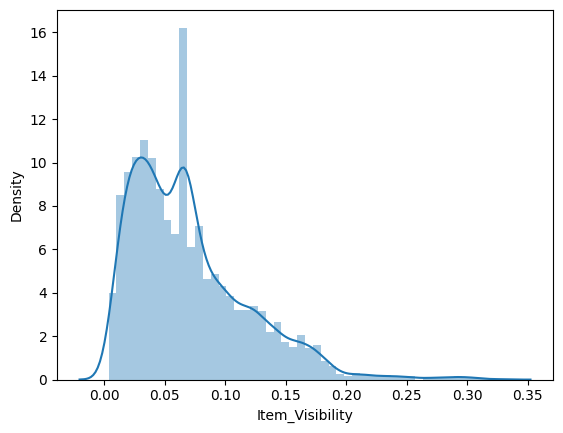

C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\975763628.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Item_MRP'])


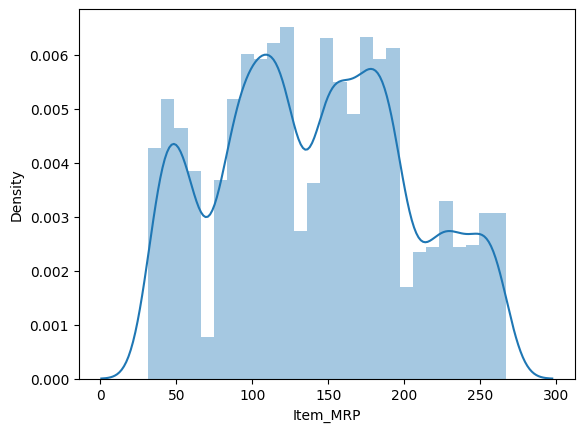

C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\975763628.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Item_Outlet_Sales'])


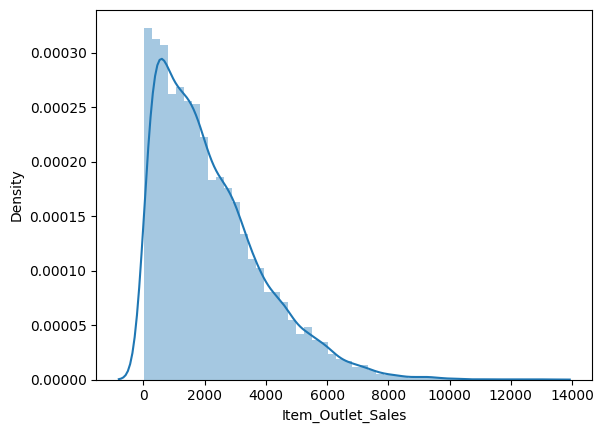

In [47]:
# Create Dist Plot – Item Visibility 
sns.distplot(dt['Item_Visibility'])
plt.show()

# Create Dist Plot – Item MRP 
sns.distplot(dt['Item_MRP'])
plt.show()

# Create Dist Plot – Item Outlet Sales 
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


In [48]:
# Log Transformation to reduce Outliers 
# The above dist plot is right skewed, there might be outliers in the right side. To reduce the outliers, implement log transformation 
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\1029061793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['Item_Outlet_Sales'])


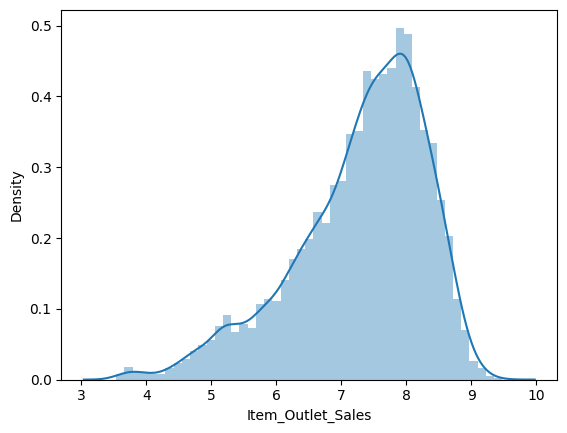

In [49]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


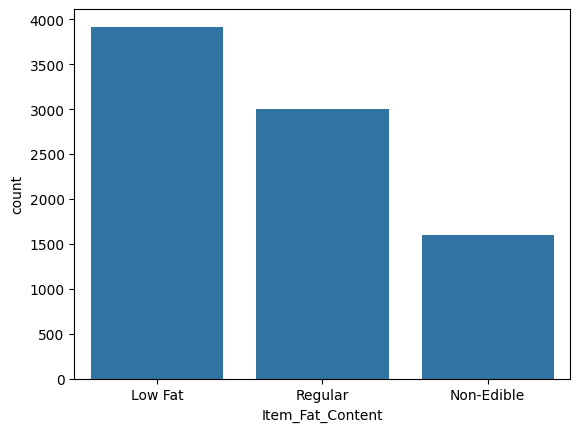

In [50]:
# Create Count Plot – Number of records in each category 
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


C:\Users\Tirth\AppData\Local\Temp\ipykernel_9716\1785616651.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(labels=l, rotation=90)


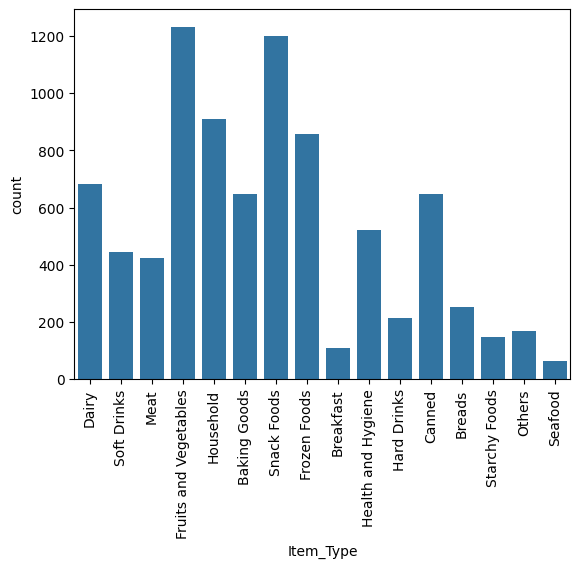

In [51]:
# Create Count Plot – Item Type 

# l is the list of unique Item Types - This is used to display X-Label 
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


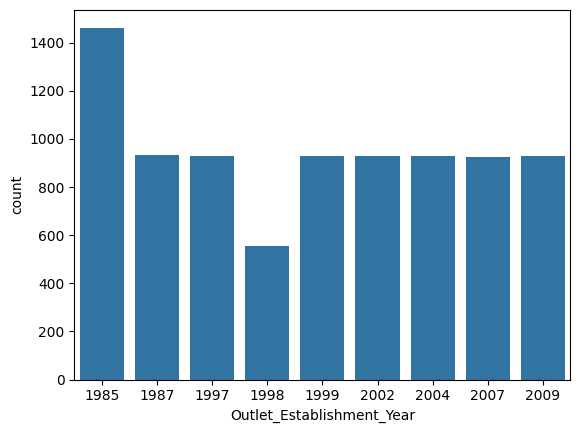

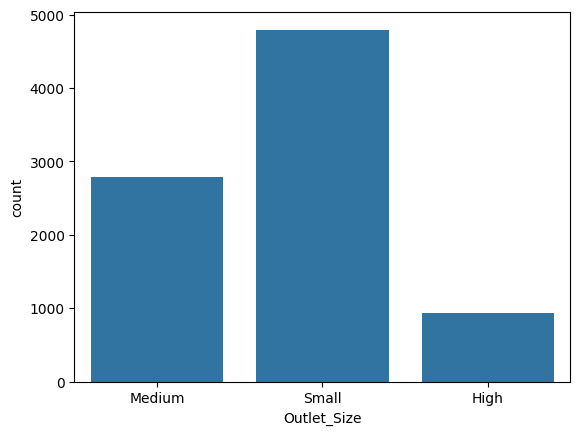

In [52]:
# Create Count Plot – Establishment year 
# Number of stores started per year  
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()

# Count Plot Outlet Size 
sns.countplot(x=dt['Outlet_Size'])
plt.show()


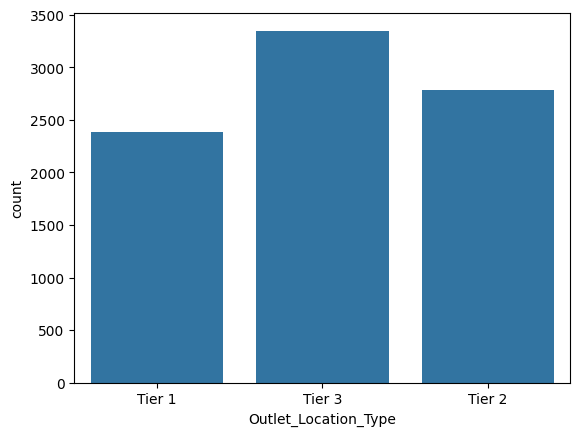

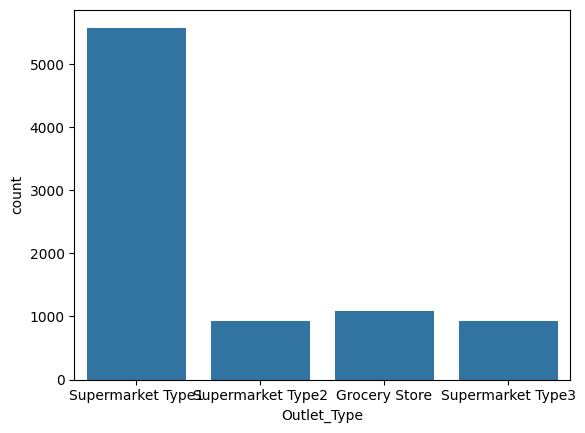

In [53]:
# Count Plot Outlet Location Type 

sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()
# Count Plot Outlet Type 
sns.countplot(x= dt['Outlet_Type'])
plt.show()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,25
1,5.920,0.019278,48.2692,2009,6.096776,15
2,17.500,0.016760,141.6180,1999,7.648868,25
3,19.200,0.066132,182.0950,1998,6.597664,26
4,8.930,0.066132,53.8614,1987,6.903451,37
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,37
8519,8.380,0.046982,108.1570,2002,6.310436,22
8520,10.600,0.035186,85.1224,2004,7.085159,20
8521,7.210,0.145221,103.1332,2009,7.521100,15


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017477,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.017477,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


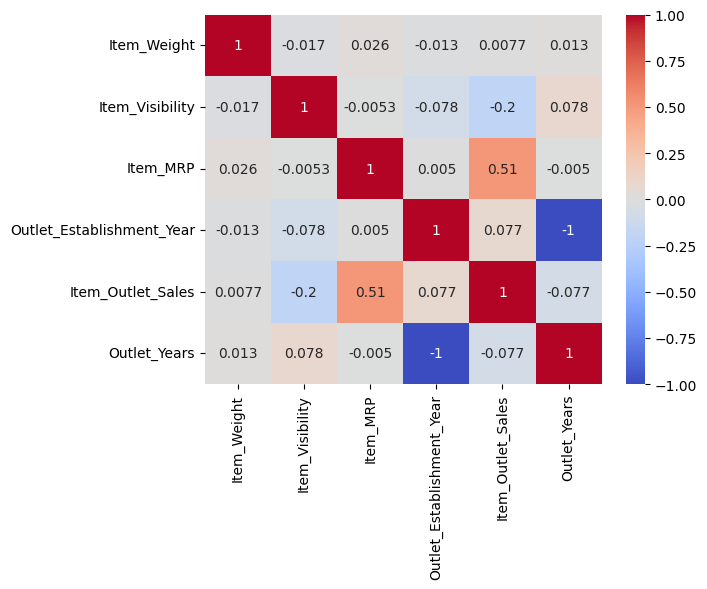

In [54]:
# Display top 3 records to check columns with numeric values 
display(dt.head(3))

# Create Data Frame with numeric columns 

dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)

# Print Co relation 
corr = dtc.corr()
display (corr)

# Print Co Relation Matrix 

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [56]:
# Label Encoding – Remaining columns with For loop  
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head()) 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


In [57]:
# One hot Encoding
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,0,1,0,1,0,0,0,0,1


In [58]:
# Create X – Remove un used columns 
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display (X.head())


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,15,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,26,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,37,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [59]:
y = dt['Item_Outlet_Sales']
display (y.head())


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
def train(model, X, y):

    print ("Train Test Split")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)
    
    # training the model
    model.fit(X_train, y_train)       
   
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    
    # Display Accuracy
    print ('Accuracy')
    print ('Accuracy of Test data')
    y_test_pred = model.predict(X_test)
    print('R2_Score:', r2_score(y_test,y_test_pred))
    print ('Accuracy of Training data')
    y_train_pred = model.predict(X_train)
    print('R2_Score:', r2_score(y_train,y_train_pred))
    print ('Accuracy of Complete data')
    y_pred = model.predict(X)
    print('R2_Score:', r2_score(y,y_pred))
    print ()

    # Display graph with actual and predicted values 
    
    plt.subplot (212)
    print ('Display actual and predicted values')
    sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
    plt.show()



Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.31453993 -0.31944537 -0.29729728 -0.31604471 -0.29779349]
ABS Average of - neg_mean_squared_error 0.3090241559535528

R2 Score 
[0.70043783 0.69084655 0.69463849 0.68896413 0.72181708]
Average R2 Score  0.6993408146266089

Accuracy
Accuracy of Test data
R2_Score: 0.6951717899236869
Accuracy of Training data
R2_Score: 0.9597988258927417
Accuracy of Complete data
R2_Score: 0.8785691844322558

Display actual and predicted values


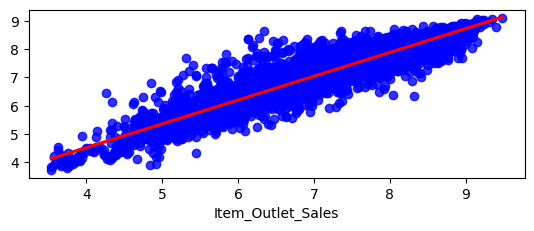

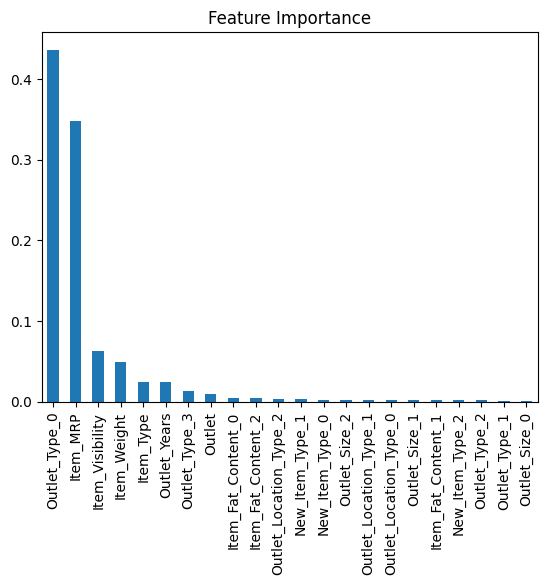

In [65]:
# Random Forest Regression  
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


# Hyper parameter tuning

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


rand_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],  
    'max_features': ['sqrt', 'log2', None],  # number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # maximum depth of tree
    'min_samples_split': [2, 5, 10, 15],  # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # minimum samples required at each leaf node
}

rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
rCV = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rand_grid,
    scoring='neg_mean_squared_error', 
    n_iter=50,  
    cv=5,  
    verbose=2,  # display progress messages
    random_state=42,  
    n_jobs=-1  # use all processors
)

rCV.fit(X_train, y_train)

print("Best Parameters:", rCV.best_params_)
print("Best Score (Negative MSE):", rCV.best_score_)



(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
Best Score (Negative MSE): -0.27541234325937786


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_pred = rCV.predict(X_test)

# Evaluate the performance
print('R2 Score:', r2_score(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))

# Predict on the entire dataset
full_rf_pred = rCV.predict(X)

# Display the results
result = pd.concat([dt, pd.DataFrame(full_rf_pred, columns=['Price Prediction'])], axis=1)
display(result)

# Evaluate the full dataset predictions
print('Full Data R2 Score:', r2_score(y, full_rf_pred))
print('Full Data Mean Absolute Error:', mean_absolute_error(y, full_rf_pred))
print('Full Data Mean Squared Error:', mean_squared_error(y, full_rf_pred))


R2 Score: 0.7206165273849471
Mean Absolute Error: 0.42230075268698664
Mean Squared Error: 0.29458239784287027


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,Price Prediction
0,FDA15,9.300,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,0,0,0,1,0,0,0,1,0,8.219144
1,DRC01,5.920,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,1,0,0,1,0,1,0,0,6.429039
2,FDN15,17.500,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,0,0,0,1,0,0,0,1,0,7.643513
3,FDX07,19.200,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,1,1,0,0,0,0,1,0,6.183801
4,NCD19,8.930,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,1,0,1,0,0,0,0,1,6.636716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,13,214.5218,OUT013,1987,7.929984,37,1,...,0,1,0,1,0,0,0,1,0,8.108409
8519,FDS36,8.380,0.046982,0,108.1570,OUT045,2002,6.310436,22,7,...,1,0,0,1,0,0,0,1,0,7.410332
8520,NCJ29,10.600,0.035186,8,85.1224,OUT035,2004,7.085159,20,6,...,1,0,0,1,0,0,0,0,1,7.165093
8521,FDN46,7.210,0.145221,13,103.1332,OUT018,2009,7.521100,15,3,...,0,1,0,0,1,0,0,1,0,7.307671


Full Data R2 Score: 0.780936203435885
Full Data Mean Absolute Error: 0.3661112701028642
Full Data Mean Squared Error: 0.22575253893817532
